# Interactive plot for data analysis
## Monte Carlo simulations were perfomed to score the energy deposited in water by three different mono-energetic proton beams: 80 keV, 1 and 5 MeV.
## A program in python was implemented to analyse the output from those simulations

### Step 1: Importing the libraries

In [46]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.widgets import CheckButtons
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib notebook

### Step 2: Implementing a class for reading and cleaning of the csv files.

In [47]:
class Reader:
    
    def __init__(self,name):
        self.name=name
        
    def open_csv(self):
        try:
            csvFileEn = pd.read_csv(self.name, delimiter=",",comment='#',header=None)
        except:
            print('csv file not found or empty')
            return(0)
            
        output = pd.DataFrame(csvFileEn)
        
        if('true' in output.isnull().any()):
            print('null data in file->cleaning')
            output=output.dropna(axis=1)
        
        else:
            print('no null data found in file')
            
        output.columns = ['X', 'Y', 'Z','E']
        print('data.head= ', output.head())
        
        return(output.Z,output.E)  # return energy along Z position


### Step 3: Set variables and names of files 

In [59]:
# set name for files and definition of variables
directory = '/Users/balder/Documents/notebooks/'
e80kv = directory + 'Energy_80kev.csv'    #file for the 80 keV proton beam
e1mv = directory + 'Energy_1mev.csv'      #file for the 1 MeV proton beam
e5mv = directory + 'Energy_5mev.csv'      #file for the 5 MeV proton beam
     
energies = [e80kv,e1mv,e5mv]              #list of energies
mylabels = ['80 keV','1 MeV','5 MeV']     #list of labels
bins = [4e-5,2e-4,5e-3]                   # each simulation was carry out with different bins 
   

### Step 4: Plotting

<IPython.core.display.Javascript object>


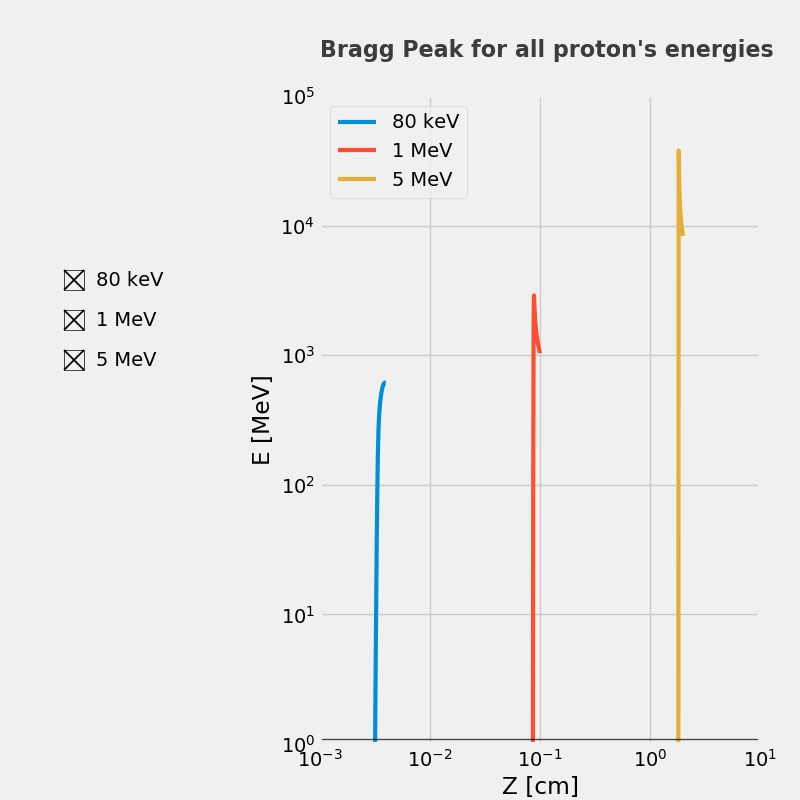

reading phsp number=  0
no null data found in file
data.head=     X  Y  Z    E
0  0  0  0  0.0
1  0  0  1  0.0
2  0  0  2  0.0
3  0  0  3  0.0
4  0  0  4  0.0
reading phsp number=  1
no null data found in file
data.head=     X  Y  Z    E
0  0  0  0  0.0
1  0  0  1  0.0
2  0  0  2  0.0
3  0  0  3  0.0
4  0  0  4  0.0
reading phsp number=  2
no null data found in file
data.head=     X  Y  Z    E
0  0  0  0  0.0
1  0  0  1  0.0
2  0  0  2  0.0
3  0  0  3  0.0
4  0  0  4  0.0


In [65]:
# start plotting
fig, ax = plt.subplots(figsize=(8,8))     # start plotting
lines=[]
for j in range(len(energies)):
    print('reading phsp number= ', j)
    var = Reader(energies[j])             # initialize class
    data = var.open_csv()                 # call method from class
    position = data[0]*bins[j]            # load distance and convert it bins to real distance
    energy = data[1]                      # load energy
    l, = ax.plot(position, energy, lw=3, label=mylabels[j])   # plotting of Bragg Peak for each energy
    lines.append(l)
    
    
# Three interactive plots are showed below: 
# Adjusting the space around the figure
plt.subplots_adjust(left=0.4)

# Addinng title and labels
#plt.title('Bragg Peak for all energies')
plt.xlabel('Z [cm]')
plt.ylabel('E [MeV]')
ax.set_yscale('log')
ax.set_xscale('log')
ax.text(x = 1e-3, y = 2e5, s = "Bragg Peak for all proton's energies",fontsize = 16, weight = 'bold', alpha = .75)
plt.axis([1e-3, 10, 1, 1e5])
plt.legend()
plt.axhline(y=1.1, color = 'black', linewidth = 1, alpha = .7)  # only for visualizaion of X-axe

# make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.07, 0.5, 0.2, 0.2])
# get the labels for each plot
labels = [str(line.get_label()) for line in lines]
# get the visibility for each plot
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

# function to show the graphs based on checked labels
def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

# on click event call function to display graph
check.on_clicked(func)
plt.show()